## 1. Tải và tiền xử lý dữ liệu
**Lý thuyết:**
- Dữ liệu giao dịch thường cần được làm sạch: loại bỏ các đơn hàng lỗi, giá trị âm

**Thực hiện:**

In [3]:
# import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc file và chuyển cột InvoiceDate thành datetime
df = pd.read_excel("E:/NEU SLIDE/MARKETING DATA SCIENCE/Copy of Online Retail.xlsx", parse_dates=["InvoiceDate"])
df.head()

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


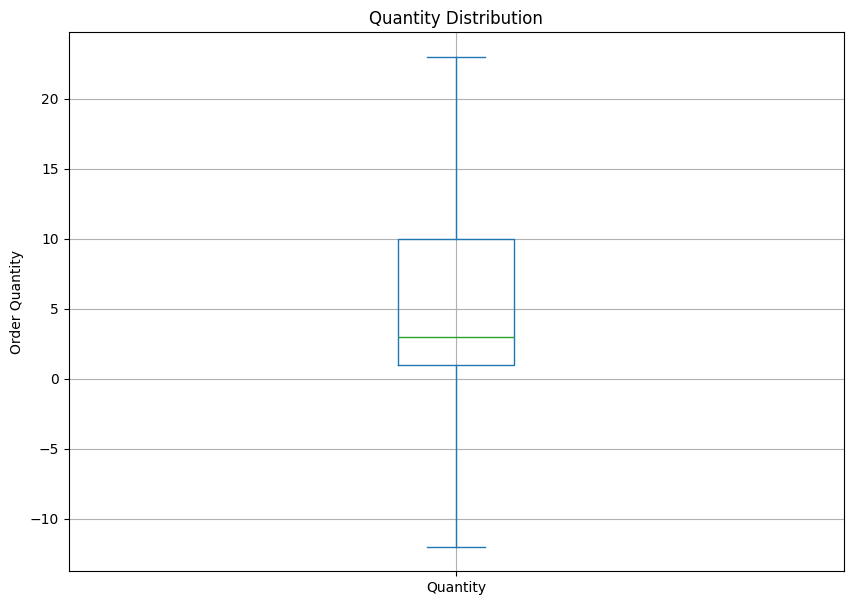

In [3]:

# vẽ biểu đồ boxplot để quan sát biến QUantity
ax = df['Quantity'].plot.box(showfliers=False,
                             grid=True,
                             figsize=(10, 7)) 
ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')
plt.suptitle("")
plt.show()

In [4]:

# nhận thấy có những đơn hàng mà số sản phẩm là âm (đây là những đơn hàn đã bị cancel)
df[df['Quantity']<0].head()

#loại bỏ những đơn hàng đã bị hủy
df = df[df['Quantity']>0]
print(df[df['UnitPrice']<=0].head())
df = df[df['UnitPrice']>0]


# Tạo điều kiện lọc từ 01/01/2011 đến 31/05/2011
start_date = "2011-01-01"
end_date = "2011-05-31"

filtered_df = df[(df["InvoiceDate"] >= start_date) & (df["InvoiceDate"] <= end_date)]

filtered_df.info()


     InvoiceNo StockCode Description  Quantity         InvoiceDate  UnitPrice  \
622     536414     22139         NaN        56 2010-12-01 11:52:00        0.0   
1970    536545     21134         NaN         1 2010-12-01 14:32:00        0.0   
1971    536546     22145         NaN         1 2010-12-01 14:33:00        0.0   
1972    536547     37509         NaN         1 2010-12-01 14:33:00        0.0   
1987    536549    85226A         NaN         1 2010-12-01 14:34:00        0.0   

      CustomerID         Country  
622          NaN  United Kingdom  
1970         NaN  United Kingdom  
1971         NaN  United Kingdom  
1972         NaN  United Kingdom  
1987         NaN  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
Index: 161207 entries, 42481 to 207747
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    161207 non-null  object        
 1   StockCode    161207 non-null  object   

In [8]:
#TẠO FILE EXCEL VỚI DỮ LIỆU ĐÃ ĐƯỢC XỬ LÝ
filtered_df.to_excel("E:/NEU SLIDE/MARKETING DATA SCIENCE/OnlineRetail_filtered.xlsx", index=False)


KeyboardInterrupt: 

## 2. Khám phá dữ liệu


### 2.1. Top sản phẩm bán chạy


#### 2.1.1. Top sản phẩm bán chạy trong toàn bộ giai đoạn

$$ Sales = \text{UnitPrice} \times \text{Quantity} $$

##### a. Tính tổng Quantity và Sales cho từng StockCode

In [46]:
#Tính tổng Quantity của từng StockCode 
total_quantity_by_stock = filtered_df.groupby('StockCode')['Quantity'].sum().reset_index()
#Sắp xếp StockCode theo Quantity giảm dần
top_by_quantity = total_quantity_by_stock.sort_values(by='Quantity', ascending=False)
print(top_by_quantity.head(10))

#Tính tổng Sales cho từng StockCode
filtered_df['Sales'] = filtered_df['Quantity'] * filtered_df['UnitPrice']
total_sales_by_stock = filtered_df.groupby('StockCode')['Sales'].sum().reset_index()
#Sắp xếp StockCode theo Sales giảm dần
top_by_sales = total_sales_by_stock.sort_values(by='Sales', ascending=False)
print(top_by_sales.head(10))



     StockCode  Quantity
1907     23166     75015
2339     84077     22886
2764    85099B     17155
2781    85123A     17089
1049     22197     15977
405      21212     15919
12       15036     12961
2590     84879     11616
876      21977     11591
1424     22616     10523
     StockCode     Sales
1907     23166  78072.32
1247     22423  69113.19
3212       DOT  53239.22
2781    85123A  46759.83
2128     47566  44450.63
2764    85099B  32721.71
3215      POST  29955.70
3213         M  24897.16
2590     84879  19010.24
638      21621  15745.52


##### b. Trực quan hóa

C:\Users\DELL\AppData\Local\Temp\ipykernel_26524\714616635.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='StockCode', data=top_10_quantity, palette='Blues_d')
C:\Users\DELL\AppData\Local\Temp\ipykernel_26524\714616635.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='StockCode', data=top_10_sales, palette='Greens_d')


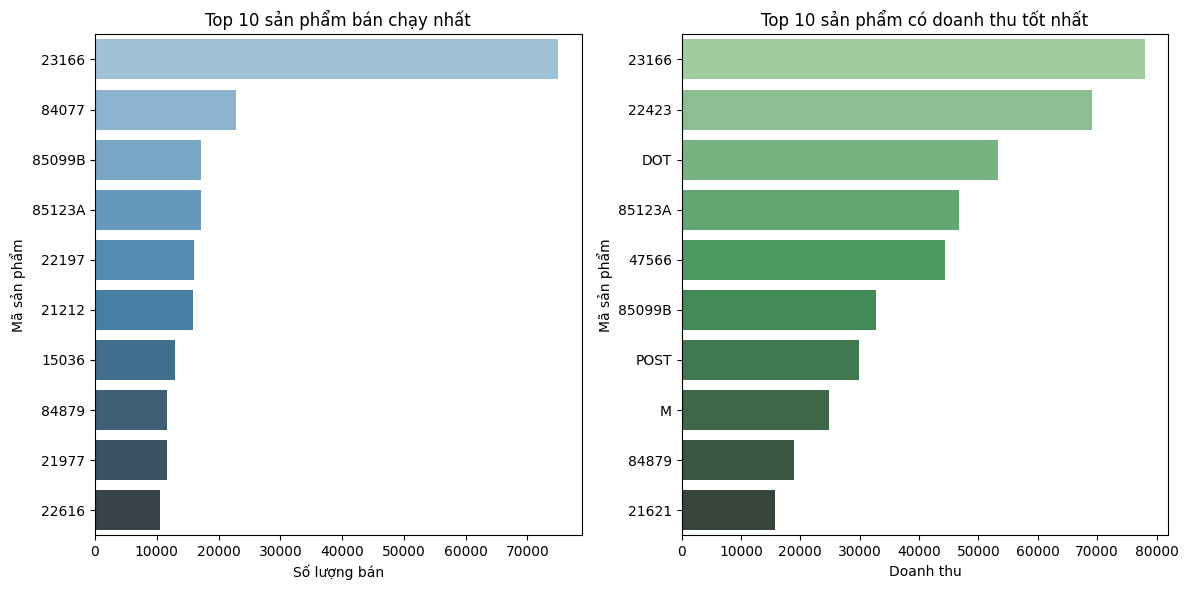

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lấy Top 10 sản phẩm theo Quantity
top_10_quantity = top_by_quantity.head(10)

# Lấy Top 10 sản phẩm theo Sales
top_10_sales = top_by_sales.head(10)

# Vẽ biểu đồ cột cho Top 10 sản phẩm theo Quantity
plt.figure(figsize=(12, 6))

# Biểu đồ cột cho Quantity
plt.subplot(1, 2, 1)
sns.barplot(x='Quantity', y='StockCode', data=top_10_quantity, palette='Blues_d')
plt.title("Top 10 sản phẩm bán chạy nhất")
plt.xlabel("Số lượng bán")
plt.ylabel("Mã sản phẩm")

# Biểu đồ cột cho Sales
plt.subplot(1, 2, 2)
sns.barplot(x='Sales', y='StockCode', data=top_10_sales, palette='Greens_d')
plt.title("Top 10 sản phẩm có doanh thu tốt nhất")
plt.xlabel("Doanh thu")
plt.ylabel("Mã sản phẩm")


# Hiển thị biểu đồ
plt.tight_layout()
plt.show()



#### 2.1.2. Top sản phẩm bán chạy theo tháng

##### a. Tính Quantity và Sales cho từng StockCode theo tháng

In [48]:
#Tạo biến tháng
filtered_df['InvoiceMonth'] = pd.to_datetime(filtered_df['InvoiceDate']).dt.to_period('M')
filtered_df.to_excel("E:/NEU SLIDE/MARKETING DATA SCIENCE/OnlineRetail_filtered.xlsx", index=False)

# Tính tổng Quantity của từng StockCode theo tháng
total_quantity_by_stock_monthly = filtered_df.groupby([pd.Grouper(key='InvoiceDate', freq='M'), 'StockCode'])['Quantity'].sum().reset_index()


# Tính tổng Sales cho từng StockCode theo tháng
filtered_df['Sales'] = filtered_df['Quantity'] * filtered_df['UnitPrice']
total_sales_by_stock_monthly = filtered_df.groupby([pd.Grouper(key='InvoiceDate', freq='M'), 'StockCode'])['Sales'].sum().reset_index()


# Chia thành các DataFrame riêng theo từng tháng
quantity_monthly_dfs = {str(month): data.sort_values(by='Quantity', ascending=False) for month, data in total_quantity_by_stock_monthly.groupby('InvoiceDate')}
sales_monthly_dfs = {str(month): data.sort_values(by='Sales', ascending=False) for month, data in total_sales_by_stock_monthly.groupby('InvoiceDate')}

print(quantity_monthly_dfs)
print(sales_monthly_dfs)


{'2011-01-31 00:00:00':      InvoiceDate     StockCode  Quantity
1645  2011-01-31         23166     74215
2255  2011-01-31        85123A      5533
339   2011-01-31         21212      3411
274   2011-01-31         21108      3246
45    2011-01-31         17003      3181
...          ...           ...       ...
2549  2011-01-31        90214F         1
2572  2011-01-31  gift_0001_30         1
2462  2011-01-31         90147         1
2463  2011-01-31         90148         1
2170  2011-01-31         85006         1

[2573 rows x 3 columns], '2011-02-28 00:00:00':      InvoiceDate     StockCode  Quantity
3335  2011-02-28         22053      3986
3881  2011-02-28         22693      3795
4432  2011-02-28         84077      3518
4721  2011-02-28        85099B      3080
3812  2011-02-28         22616      2725
...          ...           ...       ...
2593  2011-02-28        15058B         1
2592  2011-02-28        15056p         1
4912  2011-02-28        90176C         1
4969  2011-02-28  gift_00

C:\Users\DELL\AppData\Local\Temp\ipykernel_26524\2147595947.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_quantity_by_stock_monthly = filtered_df.groupby([pd.Grouper(key='InvoiceDate', freq='M'), 'StockCode'])['Quantity'].sum().reset_index()
C:\Users\DELL\AppData\Local\Temp\ipykernel_26524\2147595947.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_sales_by_stock_monthly = filtered_df.groupby([pd.Grouper(key='InvoiceDate', freq='M'), 'StockCode'])['Sales'].sum().reset_index()


##### b. Trực quan hóa

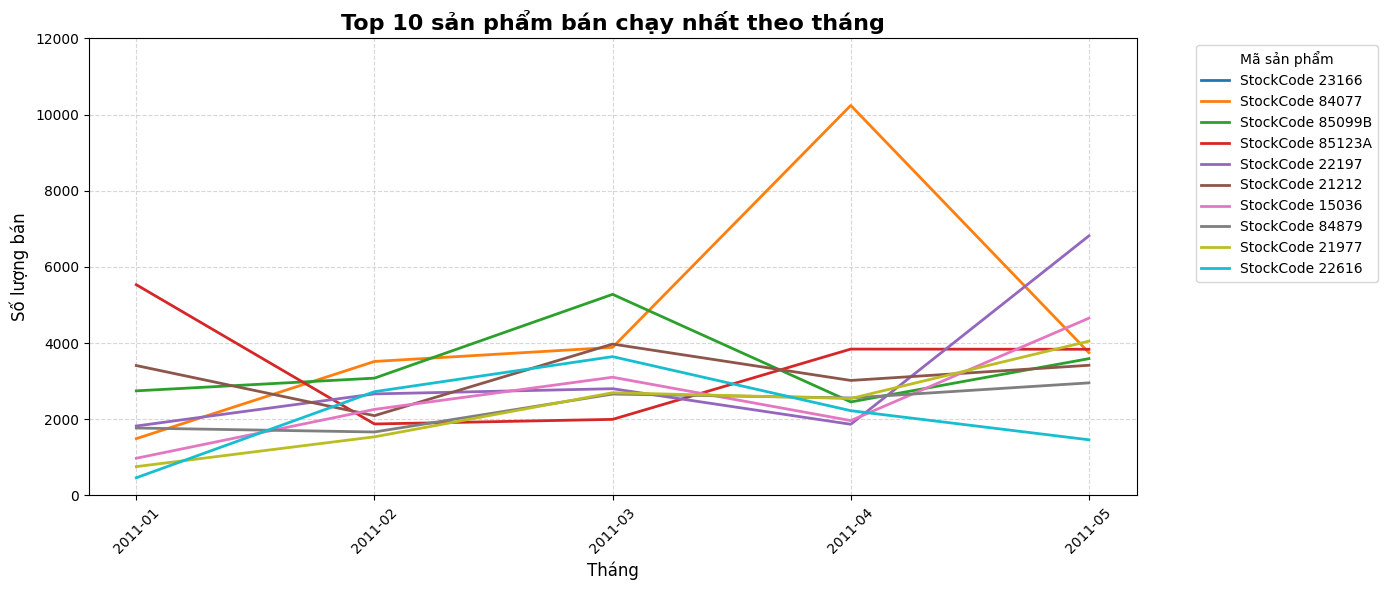

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

filtered_df['Month'] = filtered_df['InvoiceDate'].dt.to_period('M')  # chuyển thành định dạng tháng
quantity_time_series = filtered_df[['Month', 'StockCode', 'Quantity']]


# Tạo pivot table
quantity_pivot = quantity_time_series.pivot_table(
    index='Month', 
    columns='StockCode', 
    values='Quantity', 
    aggfunc='sum'
)

# Chọn Top 10 sản phẩm theo tổng số lượng
top_10_quantity = quantity_pivot.sum().sort_values(ascending=False).head(10).index

# Tạo nhãn trục X
x_labels_qty = [pd.to_datetime(str(m)).strftime('%Y-%m') for m in quantity_pivot.index]

# Vẽ biểu đồ
plt.figure(figsize=(14, 6))
colors = sns.color_palette('tab10', n_colors=10)

for i, stock in enumerate(top_10_quantity):
    plt.plot(
        x_labels_qty,
        quantity_pivot[stock],
        label=f'StockCode {stock}',
        color=colors[i],
        linewidth=2
    )

# Tùy chỉnh biểu đồ
plt.title("Top 10 sản phẩm bán chạy nhất theo tháng", fontsize=16, weight='bold')
plt.xlabel("Tháng", fontsize=12)
plt.ylabel("Số lượng bán", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 12000)  # Giới hạn trục Y
plt.legend(title="Mã sản phẩm", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


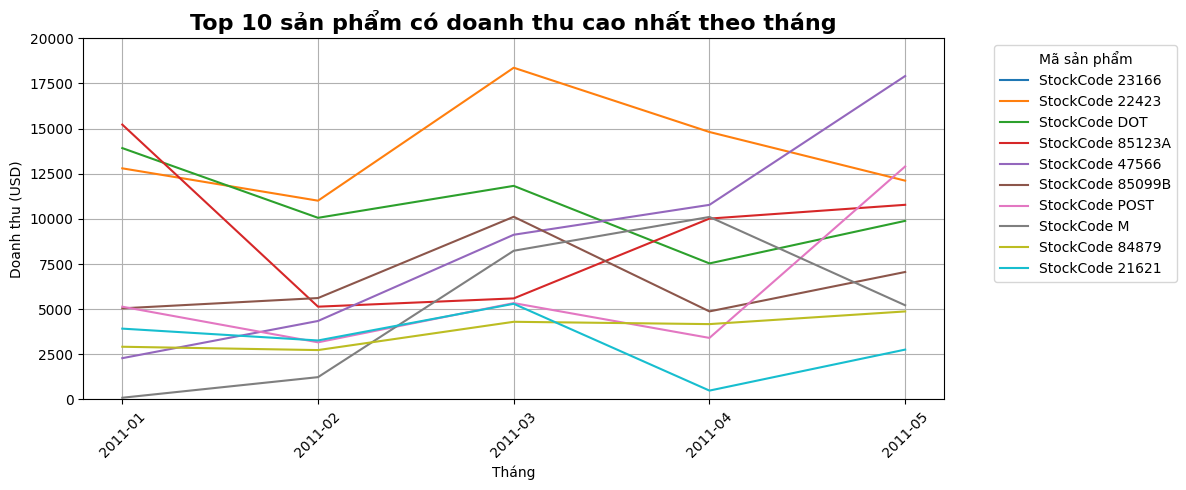

In [44]:

# SALES
sales_time_series = pd.concat(sales_monthly_dfs)
sales_time_series['Month'] = sales_time_series['InvoiceDate'].dt.to_period('M')
sales_pivot = sales_time_series.pivot_table(index='Month', columns='StockCode', values='Sales', aggfunc='sum')
top_5_sales = sales_pivot.sum().sort_values(ascending=False).head(10).index
x_labels_sales = [pd.to_datetime(str(m)).strftime('%Y-%m') for m in sales_pivot.index]

plt.figure(figsize=(12, 5))
for stock in top_5_sales:
    plt.plot(x_labels_sales, sales_pivot[stock], label=f'StockCode {stock}')

plt.title("Top 10 sản phẩm có doanh thu cao nhất theo tháng", fontsize=16, weight='bold')
plt.xlabel("Tháng")
plt.ylabel("Doanh thu (USD)")
plt.xticks(rotation=45)
plt.ylim(0, 20000)  # Giới hạn trục Y
plt.legend(title="Mã sản phẩm", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


### 2.2 Tần suất và giá trị mua hàng trung bình của mỗi khách hàng

In [14]:
#Tần suất và giá trị mua hàng trung bình
customer_stats = filtered_df.groupby('CustomerID').agg({
    'InvoiceNo': 'count',  # Tần suất mua hàng (số hóa đơn)
    'Sales': 'mean',     # Giá trị mua hàng trung bình

}).rename(columns={
    'InvoiceNo': 'Frequency',
    'Sales': 'AverageSales',
})

# Hiển thị kết quả
print(customer_stats.head())

            Frequency  AverageSales
CustomerID                         
12346.0             1  77183.600000
12347.0            53     20.974340
12348.0            11     54.040000
12350.0            17     19.670588
12352.0            38     41.100263


## 3. Xây dựng hệ thống gợi ý

In [45]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

### 3.1. Hệ thống gợi ý dựa trên khách hàng tương tự

In [7]:
#Tạo ma trận User-Item Matrix
user_item_matrix = filtered_df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum').fillna(0)

#Tính độ tương đồng giữa người dùng
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

def recommend_products(customer_id, user_similarity_df, user_item_matrix, top_n=5):
    # Kiểm tra nếu customer_id không tồn tại
    if customer_id not in user_similarity_df.index:
        print(f"Khách hàng '{customer_id}' không tồn tại trong dữ liệu.")
        return None

    # Lấy danh sách người dùng tương tự
    similar_users = user_similarity_df[customer_id].sort_values(ascending=False).index[1:]  # Bỏ chính người dùng đó
    similar_users_weights = user_similarity_df[customer_id].sort_values(ascending=False).iloc[1:]

    # Tính điểm gợi ý dựa trên người dùng tương tự
    recommendations = user_item_matrix.loc[similar_users].T.dot(similar_users_weights).sort_values(ascending=False)

    # Loại bỏ các sản phẩm mà người dùng đã mua
    already_purchased = user_item_matrix.loc[customer_id]
    recommendations = recommendations[already_purchased == 0]

    if recommendations.empty:
        print(f"Không có sản phẩm gợi ý cho khách hàng '{customer_id}'.")
        return None
    
    return recommendations.head(top_n)

# Gợi ý sản phẩm
customer_id = 12350
recommended_products = recommend_products(customer_id, user_similarity_df, user_item_matrix)

if recommended_products is not None:
    print(f"Gợi ý sản phẩm cho khách hàng {customer_id}:")
    print(recommended_products)


Gợi ý sản phẩm cho khách hàng 12350:
StockCode
84077    591.563074
21212    369.771478
22629    252.815584
22630    215.781089
22492    214.277882
dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_26524\1670097488.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recommended_products.index, y=recommended_products.values, palette='viridis')


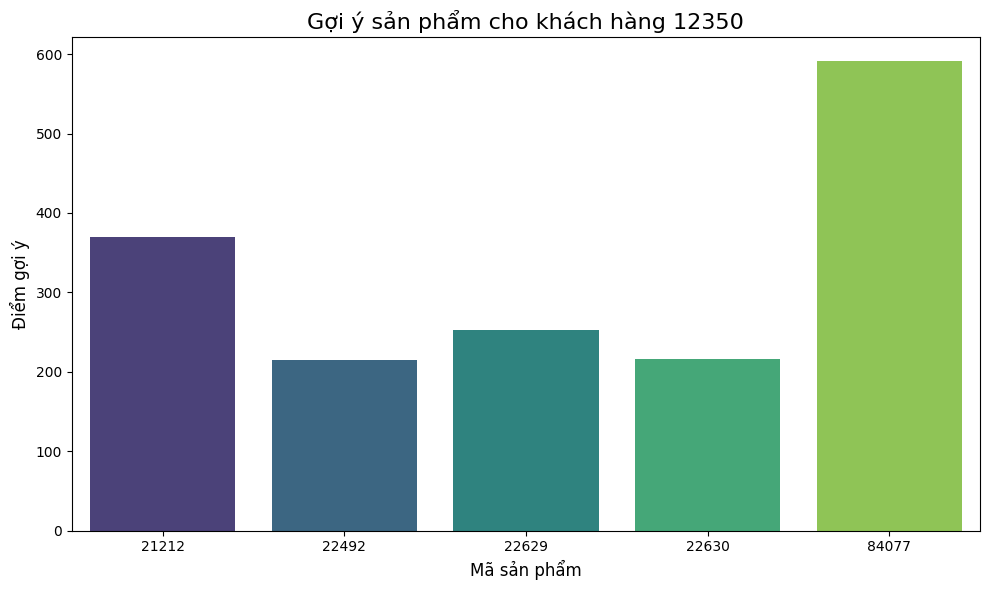

In [8]:
#Trực quan hóa gợi ý sản phẩm cho khách hàng
def plot_recommendations(recommended_products, customer_id):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=recommended_products.index, y=recommended_products.values, palette='viridis')
    plt.title(f'Gợi ý sản phẩm cho khách hàng {customer_id}', fontsize=16)
    plt.xlabel('Mã sản phẩm', fontsize=12)
    plt.ylabel('Điểm gợi ý', fontsize=12)
    plt.tight_layout()
    plt.show()

# Gọi hàm vẽ đồ thị
plot_recommendations(recommended_products, customer_id)

### 3.2. Hệ thống gợi ý dựa trên sản phẩm tương tự

In [9]:
# Tạo ma trận Item-User
item_user_matrix = filtered_df.pivot_table(index='StockCode', columns='CustomerID', values='Quantity', aggfunc='sum').fillna(0)

# Ép kiểu index và columns về string (cả hàng và cột)
item_user_matrix.index = item_user_matrix.index.astype(str)
item_user_matrix.columns = item_user_matrix.columns.astype(str)

# Tính độ tương đồng giữa các sản phẩm
item_similarity = cosine_similarity(item_user_matrix)
item_similarity_df = pd.DataFrame(item_similarity, index=item_user_matrix.index, columns=item_user_matrix.index)

# Đảm bảo rằng index của item_similarity_df là chuỗi
item_similarity_df.index = item_similarity_df.index.astype(str)

def recommend_similar_items(product_code, item_similarity_df, top_n=5):
    # Kiểm tra xem mã sản phẩm có tồn tại trong ma trận tương đồng không
    if product_code not in item_similarity_df.index:
        print(f"Không có sản phẩm gợi ý cho mã sản phẩm '{product_code}'")
        return None

    # Lấy danh sách các sản phẩm tương tự
    similar_items = item_similarity_df[product_code].sort_values(ascending=False).iloc[1:top_n+1]
    
    if similar_items.empty:
        print(f"Không có sản phẩm gợi ý cho mã sản phẩm '{product_code}'.")
        return None
    
    return similar_items

# Gợi ý sản phẩm tương tự cho một mã sản phẩm cụ thể (ví dụ: "11001")
product_code = "11001"  # Ví dụ sản phẩm mã "11001"
recommended_items = recommend_similar_items(product_code, item_similarity_df)

if recommended_items is not None:
    print(f"Gợi ý sản phẩm tương tự cho mã sản phẩm '{product_code}':")
    print(recommended_items)


Gợi ý sản phẩm tương tự cho mã sản phẩm '11001':
StockCode
20670     0.421180
22415     0.416215
84559B    0.403809
84559A    0.390614
21643     0.385798
Name: 11001, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_26524\1248487481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['StockCode'] = filtered_df['StockCode'].astype(str)


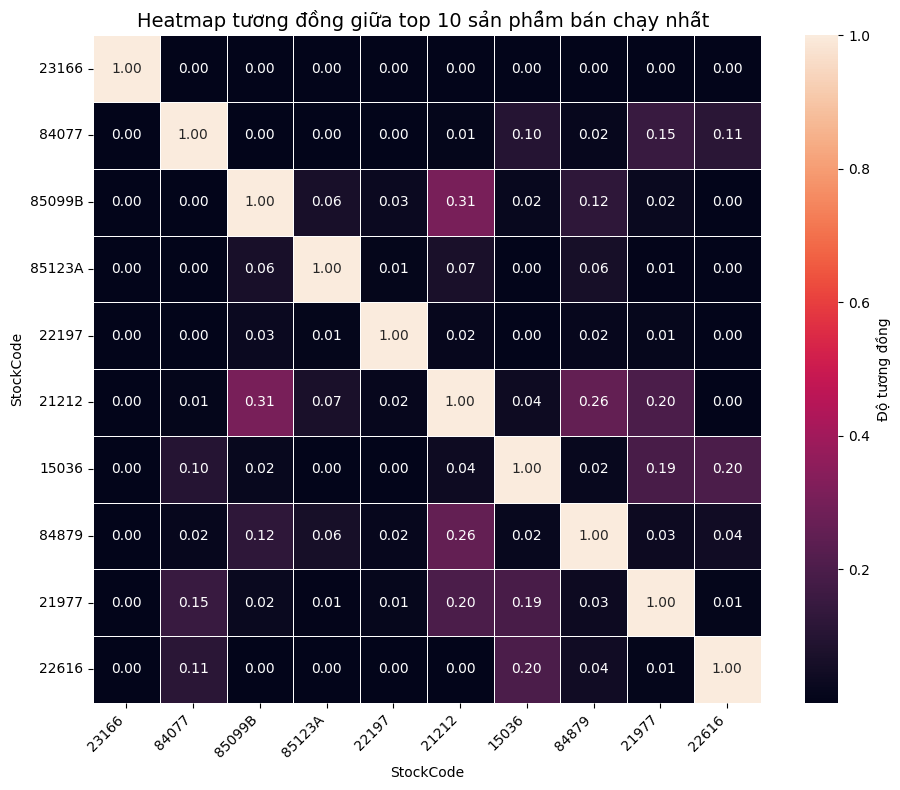

In [10]:
#Trực quan hóa sản phẩm tương đồng
filtered_df['StockCode'] = filtered_df['StockCode'].astype(str)
top_items = filtered_df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10).index
top = item_similarity_df.loc[top_items, top_items]

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top, cmap="rocket", annot=True, fmt=".2f", linewidths=0.5, square=True, cbar_kws={'label': 'Độ tương đồng'})
plt.title("Heatmap tương đồng giữa top 10 sản phẩm bán chạy nhất ", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 3.3. Hệ thống gợi ý dựa trên sản phẩm thường mua kèm

In [33]:
# Tạo BasketID từ InvoiceNo
filtered_df['BasketID'] = filtered_df['InvoiceNo'].astype(str)

basket_dict = {}

# Duyệt qua từng BasketID duy nhất
for basket_id in filtered_df['BasketID'].unique():
    temp = filtered_df[filtered_df['BasketID'] == basket_id]
    
    # Tính Quantity theo StockCode
    product_qty = temp.groupby('StockCode')['Quantity'].sum()
    
    # Lọc các sản phẩm có Quantity > 0
    product_qty = product_qty[product_qty > 0]
    
    # Tính BasketSales
    basket_sales = temp['Sales'].sum()
    
    # Tạo 1 dòng dữ liệu gồm các StockCode là cột, giá trị là Quantity
    row = product_qty.to_frame().T
    row['BasketSales'] = basket_sales
    
    # Gán vào dict
    basket_dict[basket_id] = row

# Số giỏ hàng có trong dữ liệu
total_baskets = len(basket_dict)
print(f"Tổng số giỏ hàng: {total_baskets}")


C:\Users\DELL\AppData\Local\Temp\ipykernel_26524\565236512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['BasketID'] = filtered_df['InvoiceNo'].astype(str)


Tổng số giỏ hàng: 6513


In [34]:
from itertools import combinations
from collections import defaultdict

pair_counts = defaultdict(int)

for basket_id, df in basket_dict.items():
    products = df.drop(columns='BasketSales', errors='ignore').columns
    
    # Ép kiểu tất cả về chuỗi để tránh lỗi khi sort
    products = [str(col) for col in products]

    for pair in combinations(sorted(products), 2):
        pair_counts[pair] += 1

# Chuyển thành DataFrame
pair_df = pd.DataFrame([
    {'ItemA': a, 'ItemB': b, 'Frequency': freq}
    for (a, b), freq in pair_counts.items()
])
min_freq=total_baskets*0.001

#Chỉ lọc những cặp sản phẩm tồn tại trong ít nhất 0.1% số giỏ hàng
filtered_pairs = pair_df[pair_df['Frequency'] > min_freq]
filtered_pairs.to_excel("E:/NEU SLIDE/MARKETING DATA SCIENCE/Pair.xlsx", index=False)

print(len(filtered_pairs))


238824


## Công thức tính các hệ số trong thuật toán Apriori

### 1. Support

Support đo lường xác suất xuất hiện của một sản phẩm trong toàn bộ bộ dữ liệu.

$$
\text{Support}(X) = \frac{\text{Số giỏ hàng chứa } X}{\text{Tổng số giỏ hàng}}
$$







### 2. Confidence

Confidence đo lường xác suất sản phẩm \( Y \) sẽ xuất hiện trong giỏ hàng khi sản phẩm \( X \) xuất hiện. 

$$
\text{Confidence}(X \Rightarrow Y) = \frac{\text{Support}(X \cup Y)}{\text{Support}(X)}
$$

Trong đó:
- **Support(\( X \cup Y \))**: Xác suất xuất hiện của cả hai sản phẩm \( X \) và \( Y \) trong cùng một giỏ hàng.
- **Support(\( X \))**: Xác suất xuất hiện của X trong các giỏ hàng.





### 3. Lift

Lift đo lường mức tăng xác suất xuất hiện sản phẩm Y khi trong giỏ hàng đã có sản phẩm X

$$
\text{Lift}(X \Rightarrow Y) = \frac{\text{Confidence}(X \Rightarrow Y)}{\text{Support}(Y)}
$$




In [35]:

# Tính toán Support, Confidence, và Lift cho từng cặp sản phẩm
from collections import Counter

# Tổng số giỏ hàng
num_baskets = len(basket_dict)

# Tính số lần mỗi sản phẩm xuất hiện trong các giỏ
item_counter = Counter()

for basket_id, df in basket_dict.items():
    items = df.drop(columns='BasketSales', errors='ignore').columns
    items = [str(i) for i in items]
    for item in items:
        item_counter[item] += 1

# Tính Support, Confidence, Lift
rules = []

for _, row in filtered_pairs.iterrows():
    a, b, freq_ab = row['ItemA'], row['ItemB'], row['Frequency']
    support = freq_ab / num_baskets
    conf_ab = freq_ab / item_counter[a]
    conf_ba = freq_ab / item_counter[b]
    lift_ab = conf_ab / (item_counter[b] / num_baskets)
    lift_ba = conf_ba / (item_counter[a] / num_baskets)

    rules.append({
        'ItemA': a,
        'ItemB': b,
        'Support': round(support, 4),
        'Confidence(A→B)': round(conf_ab, 4),
        'Confidence(B→A)': round(conf_ba, 4),
        'Lift(A→B)': round(lift_ab, 4),
        'Lift(B→A)': round(lift_ba, 4),
        'Frequency': freq_ab
    })

rules_df = pd.DataFrame(rules)
rules_df = rules_df.sort_values(by='Lift(A→B)', ascending=False)
#Lọc các cặp có Lift từ 1 trở lên
rules_df = rules_df[rules_df['Lift(A→B)'] >= 1]
#Suport: Xác suất đồng thời A và B cùng xuất hiện trong một giỏ hàng.
#Confidence: Xác suất Nếu khách đã mua A thì cũng mua B (Và nguowjv lại)
#Lift: Đo mức độ tăng xác suất mua B khi biết đã mua A.



In [ ]:

#Lưu bảng Apriori Rules
rules_df.to_excel("Association_Rules.xlsx", index=False)


In [36]:
import pandas as pd

# Giả sử rules_df là bảng chứa các Apriori Rules đã được tính toán trước đó
# Đọc bảng Apriori Rules (từ file Excel hoặc dataframe sẵn có)
rules_df = pd.read_excel("Association_Rules.xlsx")

# Hàm gợi ý sản phẩm cho khách hàng dựa trên các sản phẩm đã mua
def recommend_top_5_products(customer_basket, top_n=5):
    # Lọc các cặp có liên quan với sản phẩm đã mua
    related_products = rules_df[
        (rules_df['ItemA'].isin(customer_basket)) | 
        (rules_df['ItemB'].isin(customer_basket))
    ]
    
    # Tạo một dictionary lưu trữ các sản phẩm đã mua cùng với số lần xuất hiện
    recommendations = {}

    # Duyệt qua các cặp sản phẩm trong rules_df
    for _, row in related_products.iterrows():
        # Nếu sản phẩm A đã có trong giỏ hàng khách hàng, gợi ý sản phẩm B
        if row['ItemA'] in customer_basket:
            recommended_item = row['ItemB']
            lift_score = row['Lift(A→B)']
            if recommended_item not in customer_basket:
                if recommended_item not in recommendations:
                    recommendations[recommended_item] = lift_score
                else:
                    recommendations[recommended_item] += lift_score

        # Nếu sản phẩm B đã có trong giỏ hàng khách hàng, gợi ý sản phẩm A
        if row['ItemB'] in customer_basket:
            recommended_item = row['ItemA']
            lift_score = row['Lift(B→A)']
            if recommended_item not in customer_basket:
                if recommended_item not in recommendations:
                    recommendations[recommended_item] = lift_score
                else:
                    recommendations[recommended_item] += lift_score

    # Sắp xếp các sản phẩm theo score Lift (cao nhất sẽ được gợi ý đầu tiên)
    recommended_products = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)

    # Trả về top_n sản phẩm gợi ý
    top_5_recommendations = [product[0] for product in recommended_products[:top_n]]
    
    return top_5_recommendations


In [37]:

# Giả sử customer_basket là danh sách các sản phẩm mà khách hàng đã mua
customer_basket = ['21498', '85099B', '22898']  # Ví dụ giỏ hàng của khách hàng

# Gọi hàm để nhận gợi ý top 5 sản phẩm
recommended_products = recommend_top_5_products(customer_basket, top_n=5)

# Kiểm tra kết quả gợi ý
if recommended_products:
    print(f"Top 5 sản phẩm gợi ý cho khách hàng: {recommended_products}")
else:
    print("Không có sản phẩm nào được gợi ý.")



Top 5 sản phẩm gợi ý cho khách hàng: ['21499', '22939', '21500', '22704', '22367']


## 4. Trực quan hóa

Số cụm tối ưu theo silhouette score là k=7


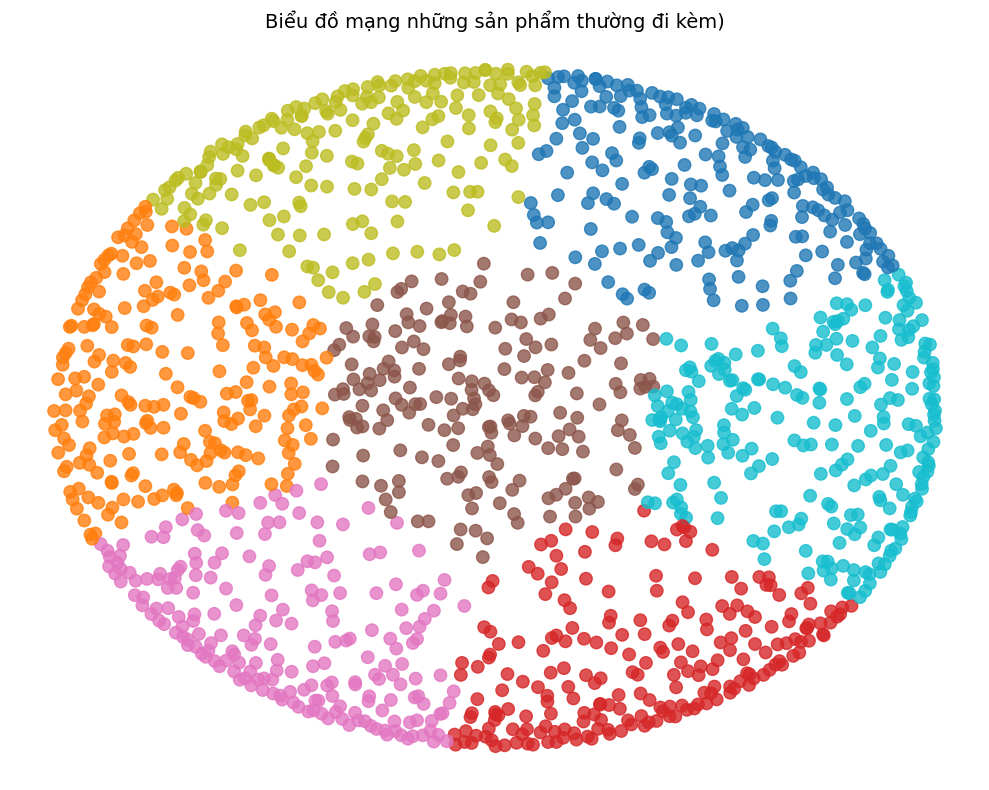

In [40]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Lấy danh sách sản phẩm liên quan trong rules_df
product_set = set(rules_df['ItemA']).union(set(rules_df['ItemB']))
product_list = list(product_set)

# 2. Tạo ma trận Lift (đối xứng) cho các sản phẩm
lift_matrix = pd.DataFrame(1.0, index=product_list, columns=product_list)  # mặc định 1 (không tương quan)

for _, row in rules_df.iterrows():
    a, b, lift = row['ItemA'], row['ItemB'], row['Lift(A→B)']
    lift_matrix.loc[a, b] = lift
    lift_matrix.loc[b, a] = lift  # làm đối xứng để dùng MDS

# 3. Chuyển sang khoảng cách = 1 / Lift
distance_matrix = 1 / lift_matrix.replace(0, np.nan)
distance_matrix = distance_matrix.fillna(distance_matrix.max().max())  # xử lý chia cho 0

# 4. Embedding MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
coords = mds.fit_transform(distance_matrix)

# 5. Tính silhouette score cho mỗi k từ 2 đến 10
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(coords)
    score = silhouette_score(coords, clusters)
    sil_scores.append(score)

# 6. Chọn số cụm k tối ưu
best_k = k_range[sil_scores.index(max(sil_scores))]
print(f'Số cụm tối ưu theo silhouette score là k={best_k}')

# 7. Phân cụm KMeans với k tối ưu
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(coords)

# 8. Vẽ scatter plot, màu theo cụm
plt.figure(figsize=(10, 8))
plt.scatter(coords[:, 0], coords[:, 1], c=clusters, cmap='tab10', s=80, alpha=0.8)


plt.title(f'Biểu đồ mạng những sản phẩm thường đi kèm)', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()
